# Sinkers vs Two Seamers

Are the classification systems the same?

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from random import randrange
import scipy.stats as sst

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pandas as pd

import glob

In [2]:
from src.ellipse import *

In [3]:
# start by selecting your year of interest
year = '2020'

# todo: add cross-year slices

In [4]:
# pull in the codes for statcast queries

PlayerDict = dict()
f = open('data/playerdict'+year+'.txt')

line = f.readline()

line = f.readline()

while line:
    PlayerDict[line.split(',')[0].strip()] = line.split(',')[1].strip()
    line = f.readline()

f.close()
print(PlayerDict['Jose Berrios'])

621244


In [5]:
year = '2020'
plr_files = glob.glob('data/*'+year+'.csv')
saved_plrs = [d.strip('data/').strip('.csv').strip('_'+year) for d in plr_files]

In [6]:
# version where we read in the saved files
BPDict = {}

BPDict[year] = {}

for pindx,pnumber in enumerate(saved_plrs):

    link = plr_files[pindx]
    BPDict[year][pnumber] = pd.read_csv(link, low_memory=False)

In [7]:
year = '2019'
plr_files = glob.glob('data/*'+year+'.csv')
saved_plrs = [d.strip('data/').strip('.csv').strip('_'+year) for d in plr_files]
BPDict[year] = {}

for pindx,pnumber in enumerate(saved_plrs):

    link = plr_files[pindx]
    BPDict[year][pnumber] = pd.read_csv(link, low_memory=False)

In [8]:

indx = 0
plr = saved_plrs[indx]


# here's everything we have access to now!
BPDict[year][plr].keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [9]:
# these are the translations from categories to numbers

PitchDict = {'CH':0,\
             'CU':1,\
             'EP':2,\
             'FO':3,\
             'FA':4,\
             'KN':5,\
             'KC':6,\
             'SC':7,\
             'SI':8,\
             'SL':9,\
             'FC':10,\
             'FS':11,\
            'FT':12,\
            'FF':13,\
            'PO':14,
            'nan':15,
            'CS':16}


iPitchDict = {0:'CH',\
             1:'CU',\
             2:'EP',\
             3:'FO',\
             4:'FA',\
             5:'KN',\
             6:'KC',\
             7:'SC',\
             8:'SI',\
             9:'SL',\
             10:'FC',\
             11:'FS',\
            12:'FT',\
            13:'FF',\
            14:'PO',\
             15:'nan',\
             16:'CS'}



In [11]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#pca.fit(X)
#print(pca.components_)
#print(pca.explained_variance_)



In [10]:
# put the data in a recognisable format

X = []
ptype = []
pname = []
poutcome = []

year = '2020'
#for plr in check_players:
for plr in saved_plrs:

    Xtmp = np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                 BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
             BPDict[year][plr]['release_spin_rate'],BPDict[year][plr]['effective_speed']]).T
    
    for val in BPDict[year][plr]['pitch_type']:
        if val not in PitchDict.keys(): 
            print(val)
            PitchDict[val] = 17
            
    ptypetmp = np.array([PitchDict[x] for x in BPDict[year][plr]['pitch_type']])
    pnametmp = np.array([plr for x in BPDict[year][plr]['pitch_type']])
    poutcometmp = np.array([x for x in BPDict[year][plr]['events']])



    # if you want to select only right handers...
    try:
        if BPDict[year][plr]['p_throws'][0] == 'R':
            for xx in range(0,Xtmp.shape[0]):
                if np.all(np.isfinite(Xtmp[xx])):
                    X.append(Xtmp[xx])
                    ptype.append(ptypetmp[xx])
                    pname.append(pnametmp[xx])
                    poutcome.append(poutcometmp[xx])
    except:
        pass
        

PT2020 = np.array(ptype)
X2020 = np.array(X)
N2020 = np.array(pname)
O2020 = np.array(poutcome)
print(X2020.shape)

nan
(175522, 12)


In [11]:
N2020.size

175522

In [12]:
X = []
ptype = []
pname = []
poutcome = []

year = '2019'
#for plr in check_players:
for plr in saved_plrs:

    Xtmp = np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                 BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
             BPDict[year][plr]['release_spin_rate'],BPDict[year][plr]['effective_speed']]).T
    
    for val in BPDict[year][plr]['pitch_type']:
        if val not in PitchDict.keys(): 
            print(val)
            PitchDict[val] = 17
            
    ptypetmp = np.array([PitchDict[x] for x in BPDict[year][plr]['pitch_type']])
    pnametmp = np.array([plr for x in BPDict[year][plr]['pitch_type']])
    poutcometmp = np.array([x for x in BPDict[year][plr]['events']])



    try:
        if BPDict[year][plr]['p_throws'][0] == 'R':
            for xx in range(0,Xtmp.shape[0]):
                if np.all(np.isfinite(Xtmp[xx])):
                    X.append(Xtmp[xx])
                    ptype.append(ptypetmp[xx])
                    pname.append(pnametmp[xx])
                    poutcome.append(poutcometmp[xx])
    except:
        pass
        

PT2019 = np.array(ptype)
X2019 = np.array(X)
N2019 = np.array(pname)
O2019 = np.array(poutcome)
print(X2019.shape)

(394375, 12)


In [13]:
# the fastest 20 sinkers from 2020

w = np.where(PT2020==8)[0]
print(w.size)

#print(np.nanmax(X2020[w,11]))
fastest = (-1.*X2020[w,11]).argsort()
for x in range(0,20):
    print(N2020[w[fastest[x]]])


w = np.where(PT2020==13)[0]
#print(w.size)
#print(np.nanmax(X2020[w,11]))



28318
JoshStaumont
EdwinDiaz
JavyGuerra
JoshStaumont
JoshStaumont
JoshStaumont
JavyGuerra
JavyGuerra
JoshStaumont
JoshStaumont
EdwinDiaz
JoshStaumont
JavyGuerra
DustinMay
JoshStaumont
JavyGuerra
CodiHeuer
CodiHeuer
ZackWheeler
CodiHeuer


In [14]:

sinkerlist = []
sinkername = []
sinkerlist2 = []
sinkername2 = []

twoseamlist = []
twoseamname = []

for plr in saved_plrs:
    w = np.where( (N2020==plr) & (PT2020==8))[0] # sinkers
    if w.size>0:
        sinkerlist2.append(w.size)
        sinkername2.append(plr)
        
    w = np.where( (N2019==plr) & (PT2019==8))[0] # sinkers
    if w.size>0:
        sinkerlist.append(w.size)
        sinkername.append(plr)
    
    v = np.where( (N2019==plr) & (PT2019==12))[0] # two-seamers
    if v.size>0:
        twoseamlist.append(v.size)
        twoseamname.append(plr)
        
    if ((w.size>0) & (v.size>0)):
        print(plr,w.size,v.size)


In [15]:
SList = np.array(sinkerlist)
TList = np.array(twoseamlist)
SName = np.array(sinkername)
TName = np.array(twoseamname)
SList2 = np.array(sinkerlist2)
SName2 = np.array(sinkername2)

for i in range(0,10):
    print(SName[(-1.*SList).argsort()[i]],SList[(-1.*SList).argsort()[i]])

print('-------------------------')


for i in range(0,10):
    print(SName2[(-1.*SList2).argsort()[i]],SList2[(-1.*SList2).argsort()[i]])
    

print('-------------------------')
for i in range(0,10):
    print(TName[(-1.*TList).argsort()[i]],TList[(-1.*TList).argsort()[i]])

DakotaHudson 1386
JakeArrieta 1216
KyleHendricks 1119
YonnyChirinos 1092
ChrisBassitt 1000
CraigStammen 888
SandyAlcantara 853
JaredHughes 815
AdamWainwright 699
SamGaviglio 605
-------------------------
BradySinger 612
ZachEflin 471
ZachDavies 445
DustinMay 445
RickPorcello 419
KyleGibson 404
AdrianHouser 403
KyleHendricks 400
AlexCobb 382
JakeArrieta 376
-------------------------
ZachDavies 1408
MikeSoroka 1140
IvanNova 1101
ZackWheeler 916
KyleGibson 886
TannerRoark 866
RickPorcello 749
JoseBerrios 722
FelixPena 701
BradKeller 689


In [16]:
# what are the unique outcomes?
print(np.unique(O2019))

['batter_interference' 'caught_stealing_2b' 'caught_stealing_3b'
 'caught_stealing_home' 'double' 'double_play' 'field_error' 'field_out'
 'fielders_choice' 'fielders_choice_out' 'force_out'
 'grounded_into_double_play' 'hit_by_pitch' 'home_run' 'interf_def' 'nan'
 'other_out' 'pickoff_1b' 'pickoff_2b' 'pickoff_3b'
 'pickoff_caught_stealing_2b' 'pickoff_caught_stealing_3b'
 'pickoff_caught_stealing_home' 'run' 'sac_bunt' 'sac_bunt_double_play'
 'sac_fly' 'sac_fly_double_play' 'single' 'strikeout'
 'strikeout_double_play' 'triple' 'triple_play' 'walk']


In [17]:
# actually do the fits!
#X2020b = X2020[np.isfinite(X2020)]
#X2019b = X2019[np.isfinite(X2019)] 



pca = PCA(n_components=2)

pca.fit(X2019[O2019=='strikeout'])



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(-500.0, 45, 'Knuckle Curves')

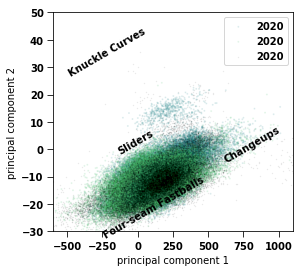

In [18]:




projected = pca.transform(X2019)



#mpl.rcParams['xtick.labelsize'] = 12
#mpl.rcParams['ytick.labelsize'] = 12



fig = plt.figure(figsize=(4.5,4))

ax1 = fig.add_axes([0.13,0.12,0.74,0.76])
#ax4 = fig.add_axes([0.88,0.12,0.015,0.76])

# all 'FF':
#w = np.where(PT2020==13)[0]

# all 'SI': (no FT this year!)
w = np.where(PT2019==8)[0]

# all 'CH':
#w = np.where(PT==0)[0]

ax1.scatter(projected[w, 0], projected[w, 1],
            color=cm.viridis(PT2019[w]/17.,1.), alpha=0.1,s=1.,marker='o',label='2020')


# all 'FT'
w = np.where(PT2019==12)[0]

ax1.scatter(projected[w, 0], projected[w, 1],
            color=cm.viridis(PT2019[w]/17.,1.), alpha=0.1,s=1.,marker='o',label='2020')


projected = pca.transform(X2020)
w = np.where(PT2020==8)[0]

ax1.scatter(projected[w, 0], projected[w, 1],
            color='black', alpha=0.1,s=.5,marker='.',label='2020')




ax1.legend()
ax1.set_xlabel('principal component 1')
ax1.set_ylabel('principal component 2')
#ax1.set_title('Gerrit Cole: PCA pitch fingerprints')
#ax1.set_title('Zack Greinke: PCA pitch fingerprints')
#ax1.set_title('Mark Melancon: PCA pitch fingerprints')


ax1.axis([-600,1100,-30,50])

#cmapi = mpl.colors.ListedColormap([cm.viridis(x/14) for x in utype])
#bounds = utype
#norm = mpl.colors.BoundaryNorm(np.array(uvals), cmapi.N)
    
#cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=cmapi,norm=norm)
#cb1.set_label('Pitch Type',size=14)
#cb1.set_xlim(1,5)
#cb1.set_ticks([1.5,3,4.5])
#cb1.set_ticklabels(['1','2','4'])
#cb1.ax.minorticks_off()

ax1.text(-250.,-9,'Four-seam Fastballs',ha='left',va='top',rotation=30)
ax1.text(600.,9,'Changeups',ha='left',va='top',rotation=30)
ax1.text(-150.,8,'Sliders',ha='left',va='top',rotation=30)
ax1.text(-500.,45,'Knuckle Curves',ha='left',va='top',rotation=30)




In [19]:
# what were all the pitches thrown in 2020?
#projected = pca.transform(X2019)

for ipt in range(0,17):
    w = np.where(PT2020==ipt)[0]
    print(ipt,iPitchDict[ipt],w.size)

0 CH 18766
1 CU 15482
2 EP 0
3 FO 3
4 FA 0
5 KN 0
6 KC 5086
7 SC 0
8 SI 28318
9 SL 32552
10 FC 11959
11 FS 3945
12 FT 0
13 FF 59082
14 PO 0
15 nan 0
16 CS 130


In [20]:
projected = pca.transform(X2019)




xbins = np.linspace(-1200,1200,90)
dx = xbins[1]-xbins[0]
ybins = np.linspace(-50,50,70)
dy = ybins[1]-ybins[0]

xxbins,yybins = np.meshgrid(xbins,ybins)

img19 = {}



#print(xbin[0:10])

for ipt in [0,1,6,8,9,10,11,13,12]:
    img19[ipt] = np.zeros([xbins.size,ybins.size])


    w = np.where(PT2019==ipt)[0]
    
    xbin = np.round((projected[w, 0] - np.nanmin(xbins))/dx).astype('int')
    ybin = np.round((projected[w, 1] - np.nanmin(ybins))/dy).astype('int')

    for xx in range(0,xbins.size):
        for yy in range(0,ybins.size):
            ww = np.where((xbin == xx) & (ybin == yy))[0]
            img19[ipt][xx,yy] = ww.size



In [21]:

projected = pca.transform(X2020)



xbins = np.linspace(-1200,1200,90)
dx = xbins[1]-xbins[0]
ybins = np.linspace(-50,50,70)
dy = ybins[1]-ybins[0]

xxbins,yybins = np.meshgrid(xbins,ybins)

img20 = {}



#print(xbin[0:10])

for ipt in [0,1,6,8,9,10,11,13]:
    img20[ipt] = np.zeros([xbins.size,ybins.size])


    w = np.where(PT2020==ipt)[0]
    
    xbin = np.round((projected[w, 0] - np.nanmin(xbins))/dx).astype('int')
    ybin = np.round((projected[w, 1] - np.nanmin(ybins))/dy).astype('int')

    for xx in range(0,xbins.size):
        for yy in range(0,ybins.size):
            ww = np.where((xbin == xx) & (ybin == yy))[0]
            img20[ipt][xx,yy] = ww.size




NameError: name 'R' is not defined

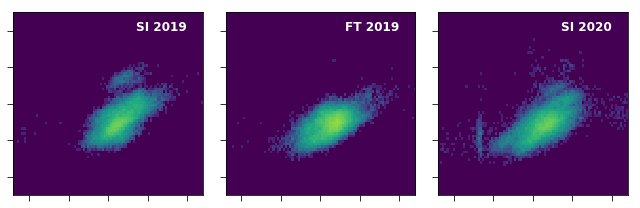

In [22]:

fig = plt.figure(figsize=(9,3))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)



ax = [ax1,ax2,ax3]

for ival,ipt in enumerate([8,12,8]):
    
    if ival < 2:
        ax[ival].imshow(np.log10(img19[ipt].T+1.),origin='lower',\
           extent=(np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)),\
          aspect='auto',cmap=cm.viridis,vmin=0.,vmax=3.)
        ax[ival].text(1000.,40.,iPitchDict[ipt]+' 2019',color='white',size=12,ha='right')
    else:
        ax[ival].imshow(np.log10(img20[ipt].T+1.),origin='lower',\
           extent=(np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)),\
          aspect='auto',cmap=cm.viridis,vmin=0.,vmax=3.)
        ax[ival].text(1000.,40.,iPitchDict[ipt]+' 2020',color='white',size=12,ha='right')
    ax[ival].set_xticklabels(());ax[ival].set_yticklabels(())
    
plt.tight_layout()


XXbins,YYbins = np.meshgrid(xbins,ybins)

#(8,12)

ipt = 8

for cval in [50,200]:

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax[0].plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')
    
for cval in [60,325]:

    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt+4],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax[1].plot(yyell,xxell,color='black',lw=2.)
    
    
for cval in [40,201]:

    XCON,YCON = follow_contour(XXbins,YYbins,img20[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax[2].plot(yyell,xxell,color='red',lw=2.)
    





Text(0.5, 1.0, 'home runs')

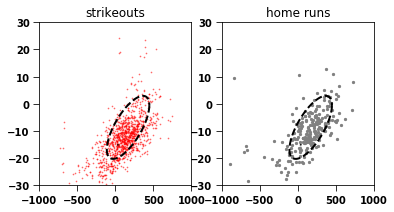

In [24]:
fig = plt.figure(figsize=(6,3))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ipt = 8

R = np.arange(0,2*np.pi, 0.01)


for cval in [50,200]:

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')
    ax2.plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')


    

projected = pca.transform(X2020)
ax.scatter(projected[(O2020=='strikeout') & (PT2020==8),0],projected[(O2020=='strikeout') & (PT2020==8),1],color='red',s=0.5,alpha=0.5)

projected = pca.transform(X2020)
ax2.scatter(projected[(O2020=='home_run') & (PT2020==8),0],projected[(O2020=='home_run') & (PT2020==8),1],color='grey',s=5.)


ax.axis([-1000,1000,-30,30])
ax2.axis([-1000,1000,-30,30])

ax.set_title('strikeouts')
ax2.set_title('home runs')


#projected = pca.transform(X2020)
#for plr in ['DakotaHudson']:
#for plr in ['KyleHendricks']:
#for plr in ['JakeArrieta']:
#for plr in ['ZachDavies']:




    #w = np.where( (N2020==plr) & (PT2020==8))[0] # sinkers
    #ax.scatter(projected[w,0],projected[w,1],color='grey',s=1.)
    


[-1200.0, 1200.0, -50.0, 50.0]

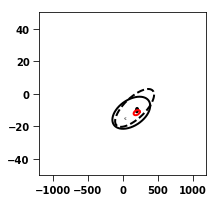

In [25]:

fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)

ipt = 8

for cval in [50,200]:

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')
    

for cval in [60,325]:

    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt+4],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.)
    
    
for cval in [40,201]:

    XCON,YCON = follow_contour(XXbins,YYbins,img20[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='red',lw=2.)
    


ax.axis([np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)])


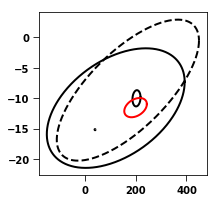

In [26]:

fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)

ipt = 8

for cval in [50,200]:

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')
    
for cval in [60,325]:

    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt+4],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.)
    
    
for cval in [40,201]:

    XCON,YCON = follow_contour(XXbins,YYbins,img20[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='red',lw=2.)
    


#ax.axis([np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)])



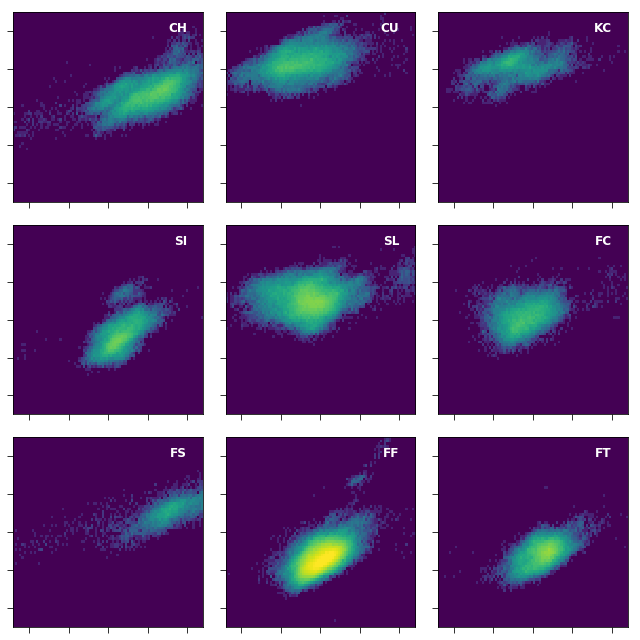

In [27]:

fig = plt.figure(figsize=(9,9))

for ival,ipt in enumerate([0,1,6,8,9,10,11,13,12]):
    ax = fig.add_subplot(3,3,ival+1)
    ax.imshow(np.log10(img19[ipt].T+1.),origin='lower',\
           extent=(np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)),\
          aspect='auto',cmap=cm.viridis,vmin=0.,vmax=3.)
    ax.text(1000.,40.,iPitchDict[ipt],color='white',size=12,ha='right')
    ax.set_xticklabels(());ax.set_yticklabels(())
    
plt.tight_layout()


KeyError: 12

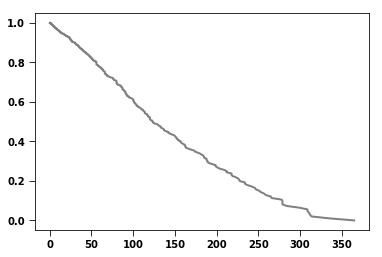

In [28]:
show = img19[ipt].reshape(-1,)
plt.plot(show[show.argsort()],1.-(np.cumsum(show[show.argsort()])/np.nansum(show)),color='grey')

show = img20[ipt].reshape(-1,)
plt.plot(show[show.argsort()],1.-(np.cumsum(show[show.argsort()])/np.nansum(show)),color='red')

show = img19[ipt+4].reshape(-1,)
plt.plot(show[show.argsort()],1.-(np.cumsum(show[show.argsort()])/np.nansum(show)),color='black')




plt.xlabel('Contour Level',size=12)
plt.ylabel('Fraction Enclosed')